# Assignment (Week 1) By PULAK JUTI BORDOLOI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load and Preprocess Data

In [2]:
#Load the dataset
df=pd.read_csv(r'~/Desktop/\PCA_practice_dataset.csv')
df.head()
X=df.to_numpy() #Convert the data to numpy
X.shape

(8041, 35)

In [3]:
#We need to scale the data with mean=0 and standard deviation=1 before we apply PCA
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Applying PCA

In [4]:
#Apply Pca
pca=PCA()
X=pca.fit_transform(X)

#Get a sum of all the eigen values for the corresponding eigen vectors
cumalitive_varience= np.cumsum(pca.explained_variance_ratio_)*100

#We declare a list of our desired thresholds
threholds= [i for i in range(90,97+1,1)]

#We make a list of the components requiredto retain the varience as mentioned in our threshold list
components=[np.argmax(cumalitive_varience>threhold) for threhold in threholds]

for component,threshold in zip(components,threholds):
    print("Components required for {}% threshold are:{}".format(threshold,component))

Components required for 90% threshold are:2
Components required for 91% threshold are:2
Components required for 92% threshold are:3
Components required for 93% threshold are:3
Components required for 94% threshold are:4
Components required for 95% threshold are:4
Components required for 96% threshold are:5
Components required for 97% threshold are:6


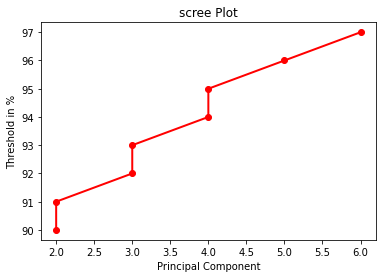

In [5]:
#We plot these data in the form of a scree plot

plt.plot(components,range(90,97+1),'ro-',linewidth=2)
plt.title("scree Plot")
plt.xlabel('Principal Component')
plt.ylabel('Threshold in %')
plt.show()

In [6]:
#Now we perform dimentionally reduction
X_orig= X

for component,var in zip(components,threholds):
    pca=PCA(n_components=component)#We pass the number of components required for each threshold
    X_transformed = pca.fit_transform(X_orig)#We get the reduced dimentionally dataset
    print('Performing dimentionality reduction to retain {}% threshold'.format(var))
    print('After dimensionality reduction,new shape of the dataset is:',X_transformed.shape)
    print("\n")

Performing dimentionality reduction to retain 90% threshold
After dimensionality reduction,new shape of the dataset is: (8041, 2)


Performing dimentionality reduction to retain 91% threshold
After dimensionality reduction,new shape of the dataset is: (8041, 2)


Performing dimentionality reduction to retain 92% threshold
After dimensionality reduction,new shape of the dataset is: (8041, 3)


Performing dimentionality reduction to retain 93% threshold
After dimensionality reduction,new shape of the dataset is: (8041, 3)


Performing dimentionality reduction to retain 94% threshold
After dimensionality reduction,new shape of the dataset is: (8041, 4)


Performing dimentionality reduction to retain 95% threshold
After dimensionality reduction,new shape of the dataset is: (8041, 4)


Performing dimentionality reduction to retain 96% threshold
After dimensionality reduction,new shape of the dataset is: (8041, 5)


Performing dimentionality reduction to retain 97% threshold
After dimensiona